# Panagiotis Karamitopoulos
# Assignment 5 - KNN


# Import Libraries

In [133]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from google.colab import files
from PIL import Image


# Question 1

#Load Dataset

In [134]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Question 2

#Plot Numbers

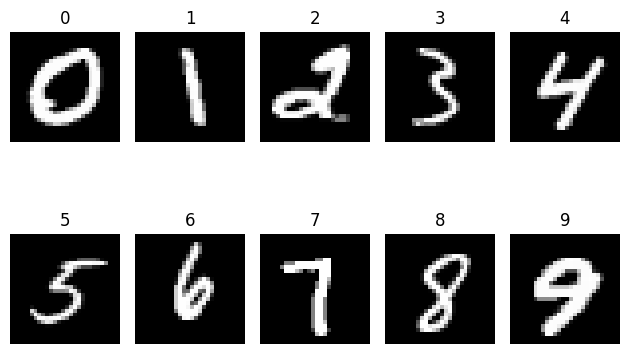

In [135]:
fig, axes = plt.subplots(2, 5)
axes = axes.flatten()

for number in range(10):
    index = np.random.choice(np.where(y_train == number)[0])
    axes[number].imshow(x_train[index], cmap='gray')
    axes[number].set_title(number)
    axes[number].axis('off')

plt.tight_layout()
plt.show()

#Question 3

Κάθε εικόνα έχει μέγεθος 28 * 28 = 784 pixels, καθώς εκτελώντας x_train.shape ή x_test.shape στο ερώτημα 1 βγαίνουν τα εξής αποτελέσματα (60000, 28, 28) και (10000, 28, 28). Επιπλέον, οι εικόνες είναι ασπρόμαυρες, άρα κάθε pixel αναπαριστά μια τιμή φωτεινότητας από 0 έως 255. Ενα μικρό ποσοστό των 784 pixels αναπαριστά το ψηφίο ενώ το μεγαλύτερο ποσοστό ανήκει στο background (μαύρα pixels με φωτεινότητα μηδέν). Συνεπώς, τα πιο σημαντικά pixels για την ταξινόμηση είναι αυτά που σχηματίζουν τις "γραμμές" του ψηφίου και όχι τα υπόλοιπα που ανήκουν background.

#Question 4

#Convert Images (Arrays) to Vectors

In [136]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

#Question 5

#5.1 Create, Train and Evaluate KNN Models with Different k Values

In [137]:
N = x_train.shape[0]
kapa = [5, 15, 51, int(np.sqrt(N))]
train_accuracy_5 = []
test_accuracy_5 = []

for i, k in enumerate(kapa):
  model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
  model.fit(x_train, y_train)
  y_pred_train = model.predict(x_train)
  train_accuracy_5.append(accuracy_score(y_train, y_pred_train))
  y_pred_test = model.predict(x_test)
  test_accuracy_5.append(accuracy_score(y_test, y_pred_test))
  print(f'k: {k} -> Train Accuracy: {train_accuracy_5[i]}, Test Accuracy {test_accuracy_5[i]}')



k: 5 -> Train Accuracy: 0.9819166666666667, Test Accuracy 0.9688
k: 15 -> Train Accuracy: 0.971, Test Accuracy 0.9633
k: 51 -> Train Accuracy: 0.9532333333333334, Test Accuracy 0.9533
k: 244 -> Train Accuracy: 0.9210666666666667, Test Accuracy 0.9241


#5.2 Plot Accuracies

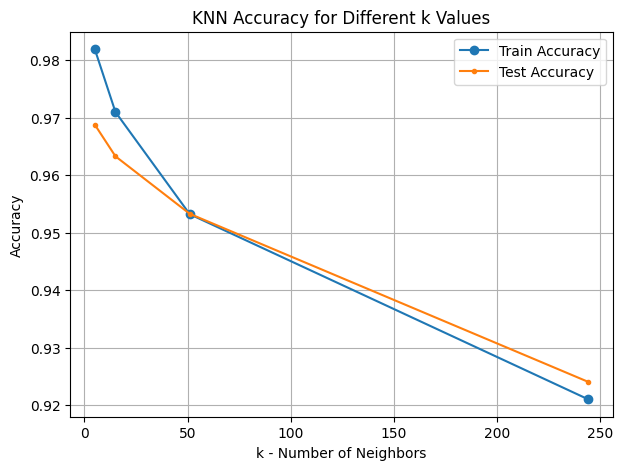

In [138]:
plt.figure(figsize=(7, 5))
plt.plot(kapa, train_accuracy_5, marker='o', label='Train Accuracy')
plt.plot(kapa, test_accuracy_5, marker='.', label='Test Accuracy')
plt.xlabel('k - Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.legend()
plt.grid()
plt.show()

#Question 6

#6.1 Normalize x_train and x_test to [0, 1]

In [139]:
x_train = x_train / 255
x_test = x_test / 255

#6.2 Create, Train and Evaluate KNN Models with Different k Values

In [141]:
N = x_train.shape[0]
kapa = [5, 15, 51, int(np.sqrt(N))]
train_accuracy_6 = []
test_accuracy_6 = []
best_accuracy = 0

for i, k in enumerate(kapa):
  model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
  model.fit(x_train, y_train)
  y_pred_train = model.predict(x_train)
  train_accuracy_6.append(accuracy_score(y_train, y_pred_train))
  y_pred_test = model.predict(x_test)
  test_accuracy_6.append(accuracy_score(y_test, y_pred_test))
  print(f'k: {k} -> Train Accuracy: {train_accuracy_6[i]}, Test Accuracy: {test_accuracy_6[i]}')

  if test_accuracy_6[i] > best_accuracy:
    best_model = model
    best_k = k
    best_accuracy = test_accuracy_6[i]

print(f'Best k: {best_k} -> Test accuracy: {best_accuracy}')


k: 5 -> Train Accuracy: 0.9819166666666667, Test Accuracy: 0.9688
k: 15 -> Train Accuracy: 0.971, Test Accuracy: 0.9633
k: 51 -> Train Accuracy: 0.9532333333333334, Test Accuracy: 0.9533
k: 244 -> Train Accuracy: 0.9210666666666667, Test Accuracy: 0.9241
Best k: 5 -> Test accuracy: 0.9688


#6.3 Plot Accuracies

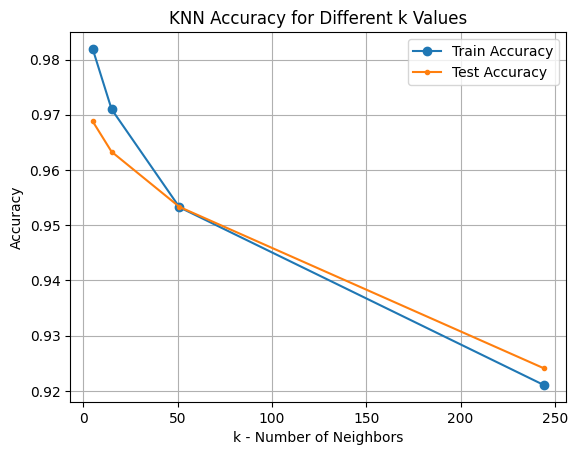

In [142]:
plt.figure()
plt.plot(kapa, train_accuracy_6, marker='o', label='Train Accuracy')
plt.plot(kapa, test_accuracy_6, marker='.', label='Test Accuracy')
plt.xlabel('k - Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.legend()
plt.grid()
plt.show()

Η ακρίβεια του μοντέλου μετά την κανονικοποίηση παραμένει ίση με την ακρίβεια του μοντέλου πριν την κανονικοποίηση για σταθερό αριθμό γειτόνων. Αυτό συμβαίνει γιατί ο ΚΝΝ βασίζεται στις αποστάσεις μεταξύ των δειγμάτων. Η διαίρεση των τιμών των x_train και x_test με το 255 δεν επηρεάζει την διάταξη των γειτόνων, απλά γίνεται ένας γραμμικός μετασχηματισμός που διαιρεί όλες τις αποστάσεις με την ίδιο αριθμό, χωρίς να επηρεάσει την ακρίβεια.

#Question 7

# 7.1 Load my Image


In [143]:
uploaded = files.upload()

Saving 4.png to 4 (1).png


#7.2 Plot my Digit

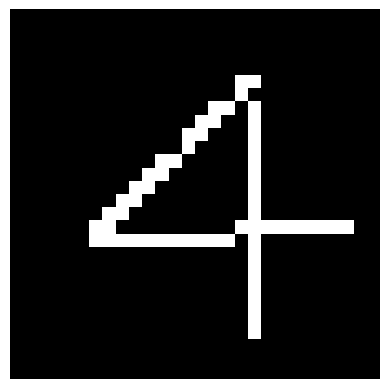

In [144]:
mydigit = Image.open('4 (1).png').convert('L')
plt.imshow(mydigit, cmap='gray')
plt.axis('off')
plt.show()

#7.3 Convert my Image to Numpy Array  

In [145]:
mydigit_array = np.array(mydigit)

#7.4 Convert Numpy Array to Vector and Normalize it

In [146]:
x_mydigit = mydigit_array.reshape(1, -1) / 255


#7.5 Predict my Digit

In [147]:
y_pred_mydigit = best_model.predict(x_mydigit)
print('Prediction:', y_pred_mydigit[0])


Prediction: 4
